In [45]:
import imageio
from IPython.display import Image
from PIL import Image
import random 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math

In [3]:
##Reading the image and splitting it in rgb using slicing.
image = imageio.imread("pp.jpg")

In [4]:
image.shape
imageio.imwrite('red.jpg', image[:, :, 0])
imageio.imwrite('green.jpg', image[:, :, 1])
imageio.imwrite('blue.jpg', image[:, :, 2])

In [5]:
#Image("red.jpg")


In [6]:
#Image("blue.jpg")


In [7]:
#Image("green.jpg")

In [8]:
##Extracting the pixel values of particular row and at a particular position
columns = image[256,:,1]
print(columns)
print(image[256,230,1])

[196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196 196
 196 196 196 196 196 197 197 197 197 196 197 196 198 198 197 201 196 196
 195 176 153 148 148 146 144 146 147 149 148 146 146 148 147 146 149 155
 156 153 139 138 142 150 155 154 156 160 159 159 159 158 157 155 153 152
 154 150 146 148 154 157 155 151 150 143 138 139 146 152 155 154 151 151
 151 152 152 153 153 153 149 150 150 150 150 149 148 147 143 140 135 133
 133 131 127 124 119 133 121 137 150 183 214 146  68  64  53  45  46  54
  56  54  50  45  39  36  36  39  41  43  45  44  40  38  35  34  33  33
  28  27  25  23  24  28  30  32  28  30  32  34  33  32  32  33  31  31
  31  30  28  27  26  26  24  24  24  25  25  26  2

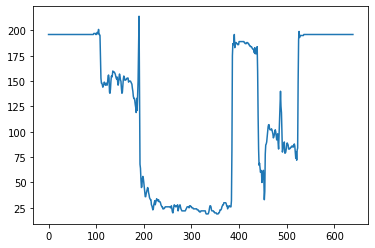

In [9]:
##Plotting the column values of the 256th row of green image and checking the intensity. Note that the intensity decreases in between showing the presence of black
plt.plot(columns)

In [10]:
##Cropping the image
im = Image.open("pp.jpg")
cropped = im.crop((1,2,300,300))
cropped.show()

In [11]:
image_r = imageio.imread("red.jpg")
image_b = imageio.imread("blue.jpg")
image_g = imageio.imread("green.jpg")
image_hybrid = image_r + image_g + image_b
imageio.imwrite('image_hybrid.jpg', image_hybrid)
image_hybrid


Array([[100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       ...,
       [ 19,  19,  19, ...,  19,  19,  19],
       [ 19,  19,  19, ...,  19,  19,  19],
       [ 19,  19,  19, ...,  19,  19,  19]], dtype=uint8)

In [12]:
image_cat = imageio.imread("cat.42.jpg")
image_pika = imageio.imread("Pikachu. (23).jpg")
print(image_cat.shape)
print(image_pika.shape)
im = Image.open("cat.42.jpg")

cat_cropped = im.crop((1,1,161,161))
imageio.imwrite('cat_cropped.jpg', cat_cropped)
image_cat = imageio.imread("cat_cropped.jpg")
print(image_cat.shape)




(173, 237, 3)
(160, 160, 3)
(160, 160, 3)


In [13]:
image_hybrid = (image_cat[:, :, 2] + image_pika[:, :, 0])/2
image_hybrid1 = image_cat[:, :, 2]/2 + image_pika[:, :, 0]/2

imageio.imwrite('image_hybrid1.jpg', image_hybrid)

Lossy conversion from float64 to uint8. Range [0.0, 127.5]. Convert image to uint8 prior to saving to suppress this warning.


(<AxesSubplot:title={'center':'Image 2'}>,
 Text(0.5, 1.0, 'Image 2'))

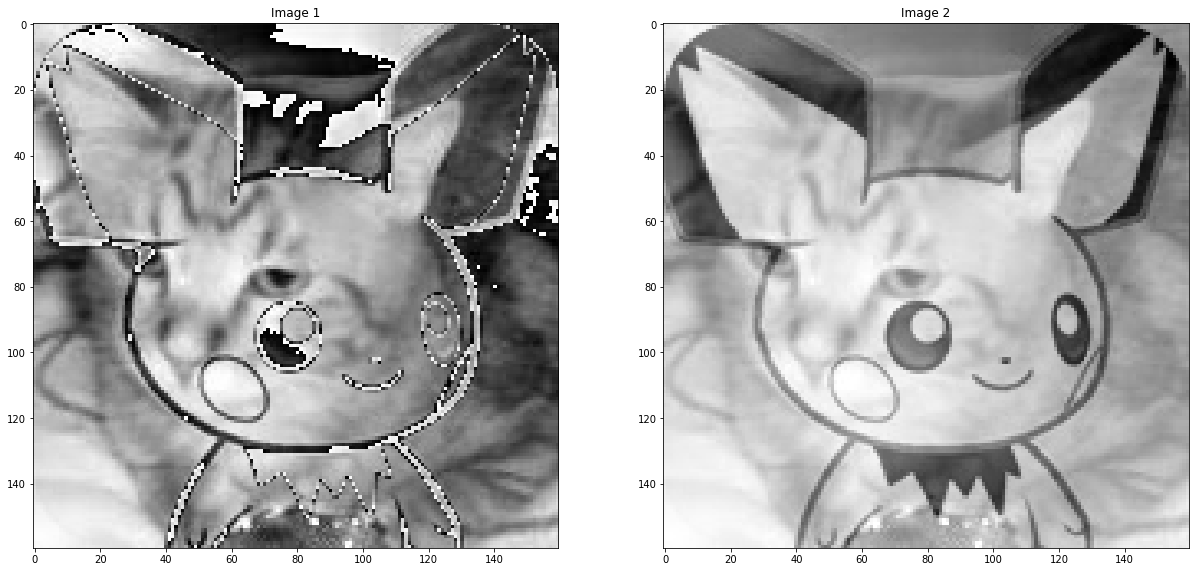

In [14]:
###Here (a+b)/2 and a/2+b/2 behaves differently, as in case 1 the number might add up to more than 255 which is the upper limit of the pixel value
#thus if the added number is 300 it will be truncated to 255 and then divided whereas in second case the pixel value is preserved and hence gives a better image
#order of the image doesn't matter, increasing (scaling) the pixel values makes the image more bright and decreasing it makes it darker.
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(image_hybrid, "gray"), plt.title("Image 1")
plt.subplot(132), plt.imshow(image_hybrid1, "gray"), plt.title("Image 2")

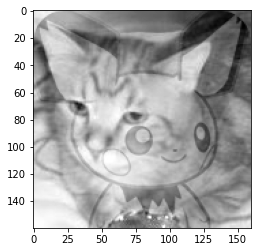

In [32]:
## blending the image. Sum of proportion should be one
image_blend = .75*image_cat[:, :, 2] + .25*image_pika[:, :, 0]
plt.imshow(image_blend, 'gray')

(<AxesSubplot:title={'center':'Noised_image'}>,
 Text(0.5, 1.0, 'Noised_image'))

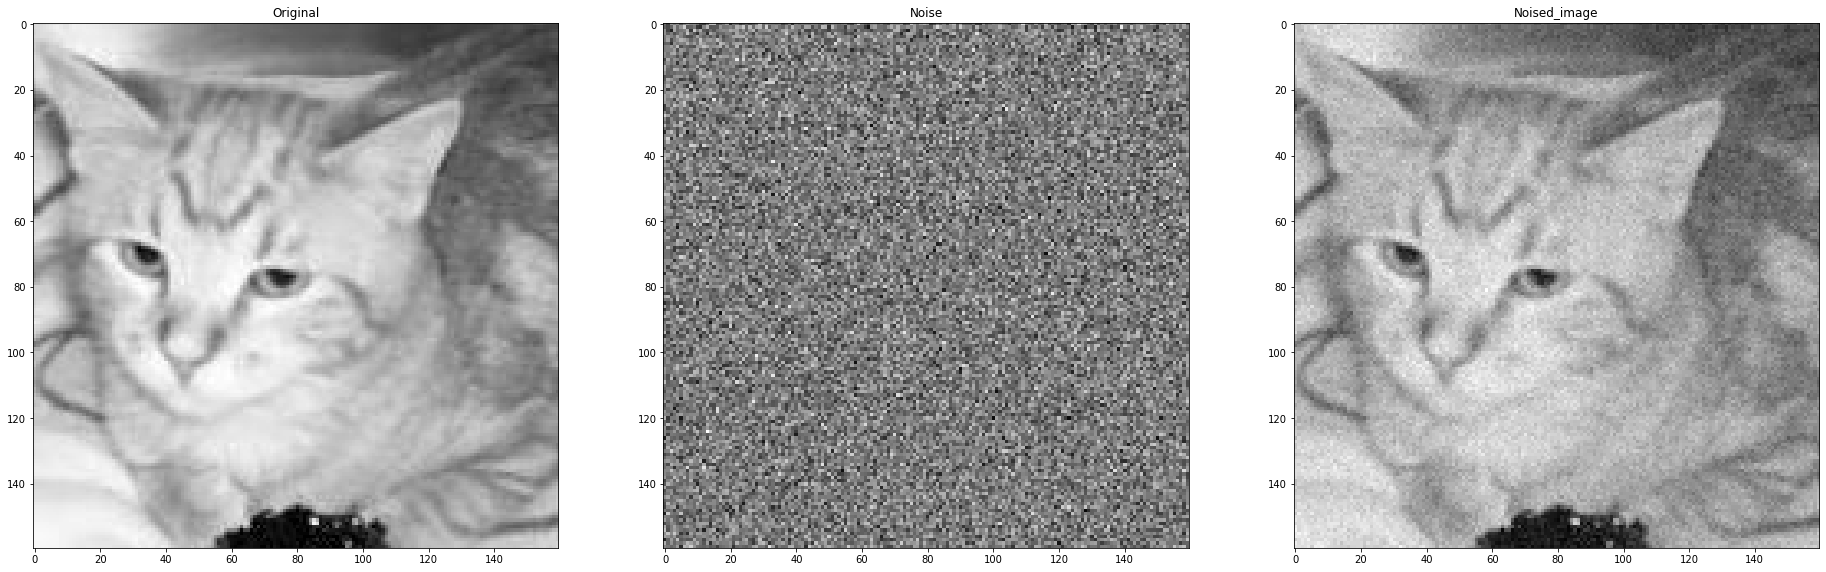

In [30]:
## adding noise, in normal disribution we assign min value to black and max to white and zero represents gray 
noise = 10*np.random.normal(loc=0.0, scale=1.0, size=image_cat.shape) ##(here 10 is sigma value, greater the sigma, more the noise)
noised_image = image_cat[:,:,1] + noise[:,:,1]
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(image_cat[:,:,1], "gray"), plt.title("Original")
plt.subplot(132), plt.imshow(noise[:, :, 1], "gray"), plt.title("Noise")
plt.subplot(133), plt.imshow(noised_image, "gray"), plt.title("Noised_image")

In [51]:
##Creating gaussian filter using the formula below.
def fspecial_gauss(size, sigma, verbose= False):

    """Function to mimic the 'fspecial' gaussian MATLAB function
    """

    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

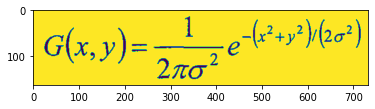

In [40]:
image = imageio.imread("img1.png")
plt.imshow(image)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x12093524ca0>)

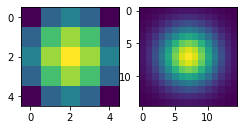

In [44]:
##5x5 gaussian filter with sigma=3
gaussian_filter = fspecial_gauss(5, 3)
gaussian_filter
plt.subplot(131), plt.imshow(gaussian_filter)
plt.subplot(132), plt.imshow(fspecial_gauss(15,3))

In [42]:
##Python formula
def gaussian_kernel(dimension_x, dimension_y, sigma_x, sigma_y):
    x = cv2.getGaussianKernel(dimension_x, sigma_x)
    y = cv2.getGaussianKernel(dimension_y, sigma_y)
    kernel = x.dot(y.T)
    return kernel

In [52]:
##Function for applying gaussian filter
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape) ##Creating an array of zeros and applying padding to the image to do same convolution.
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col]) ## applying kernel to padded image
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output

In [53]:
##Function to make gaussian filter and then apply convolution to it 
def gaussian_blur(image, kernel_size, verbose=False):
    kernel = fspecial_gauss(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

Found 3 Channels : (160, 160, 3)
Converted to Gray Channel. Size : (160, 160)
Kernel Shape : (3, 3)
Output Image size : (160, 160)
Found 3 Channels : (160, 160, 3)
Converted to Gray Channel. Size : (160, 160)
Kernel Shape : (9, 9)
Output Image size : (160, 160)
Found 3 Channels : (160, 160, 3)
Converted to Gray Channel. Size : (160, 160)
Kernel Shape : (15, 15)
Output Image size : (160, 160)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1209373d280>)

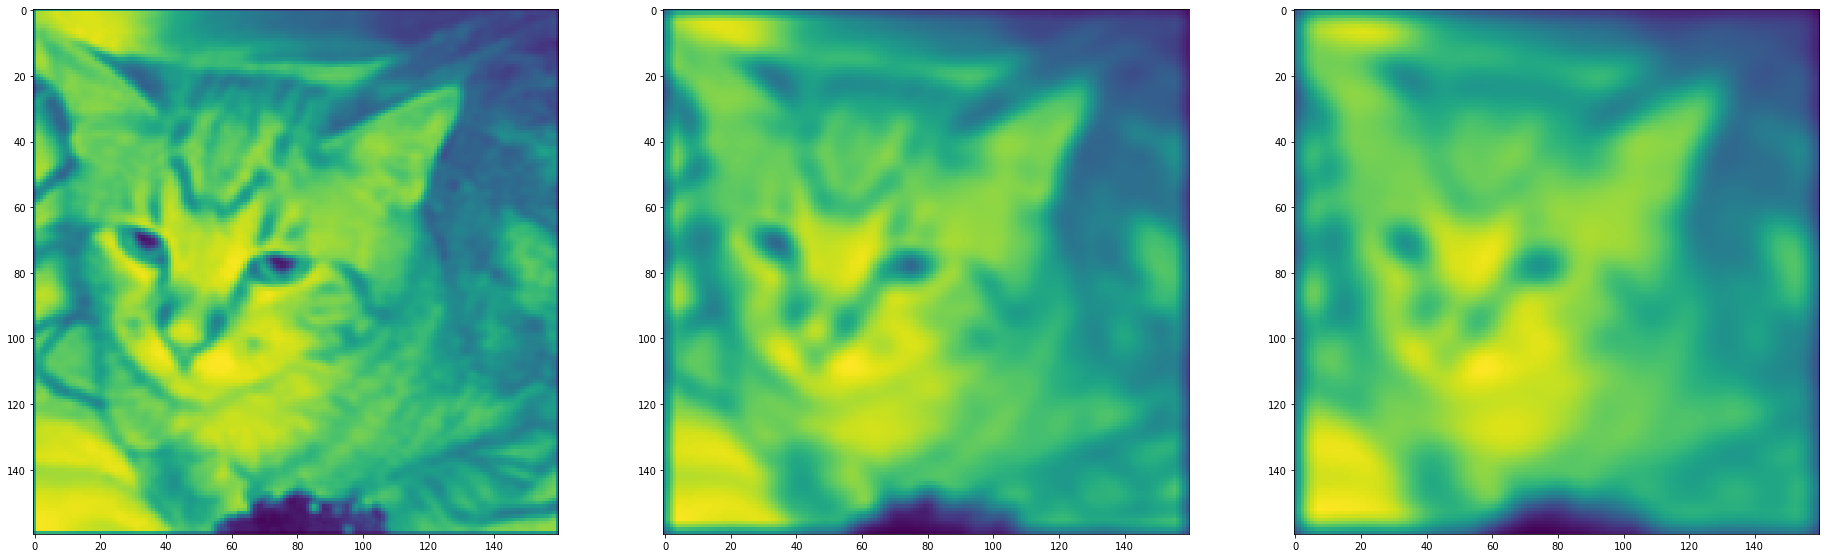

In [61]:
##Trying gaussian filter of different size
output1 = gaussian_blur(image_cat,3)
output2 = gaussian_blur(image_cat,9)
output3 = gaussian_blur(image_cat,15)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(output1)
plt.subplot(132), plt.imshow(output2)
plt.subplot(133), plt.imshow(output3)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x12093999040>)

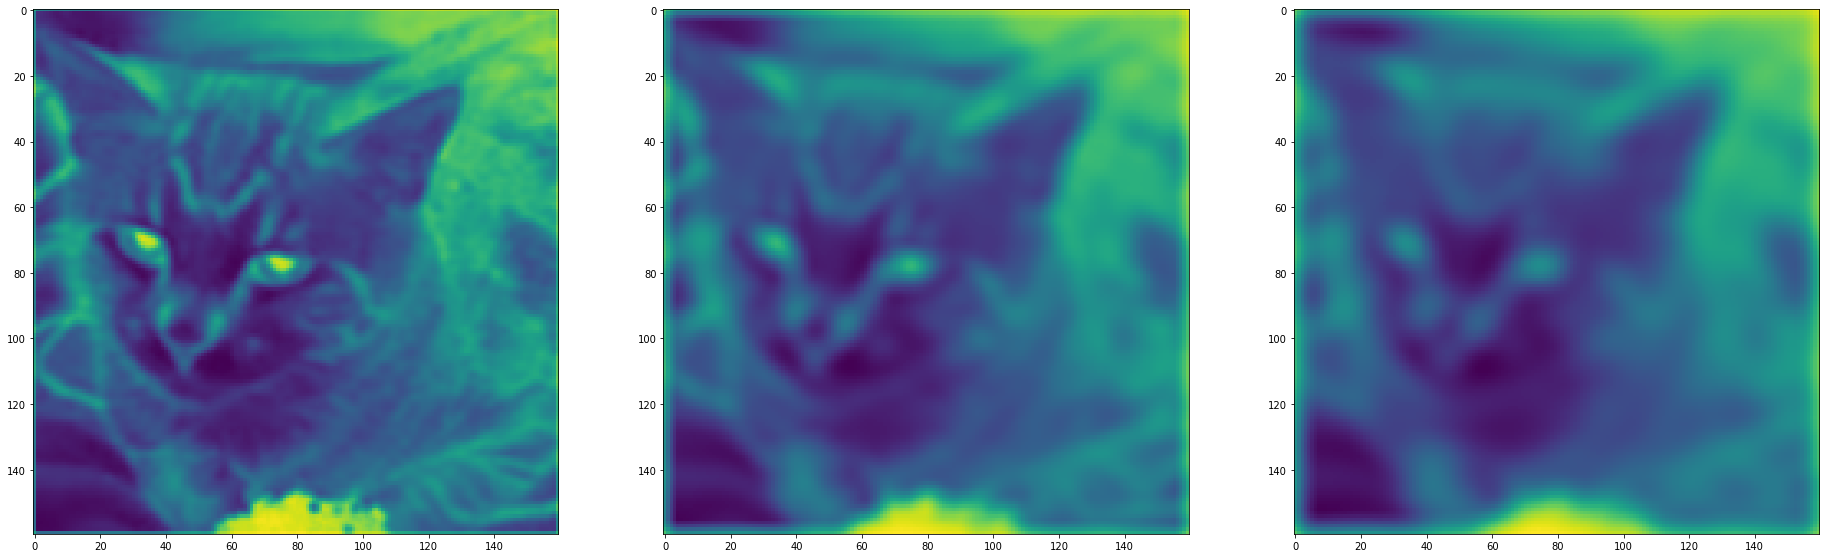

In [62]:
##Applying gaussian HPF (1-LPF)
output_HPF1 = 1-output1
output_HPF2 = 1-output2
output_HPF3 = 1-output3
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(output_HPF1)
plt.subplot(132), plt.imshow(output_HPF2)
plt.subplot(133), plt.imshow(output_HPF3)

Image Shape : (160, 160)
Kernel Shape : (3, 3)
Output Image size : (160, 160)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x120950182e0>)

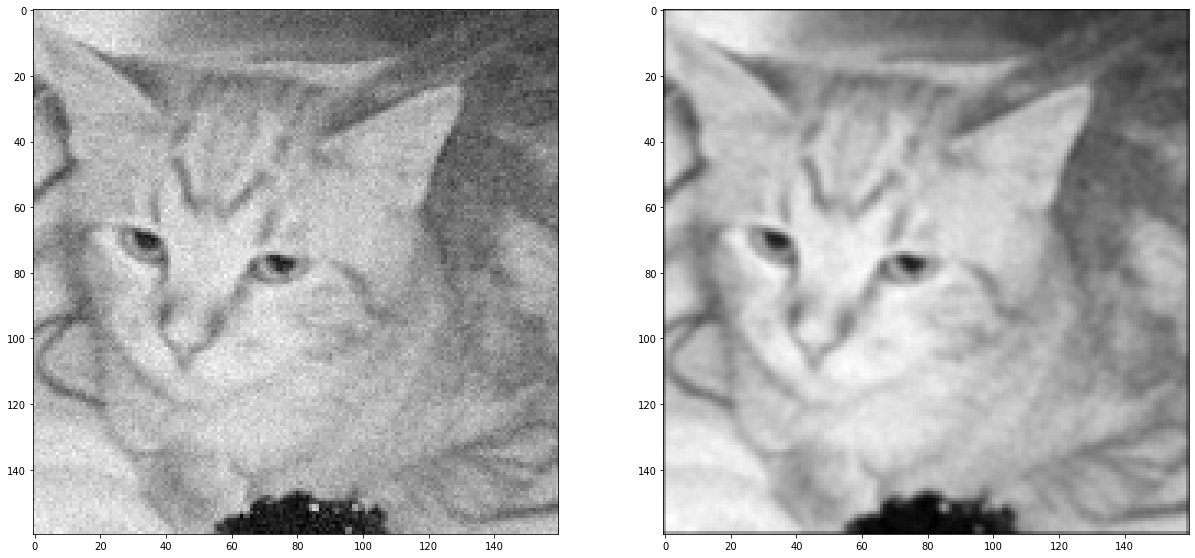

In [65]:
##Removing noise from the image
noiseless_image = gaussian_blur(noised_image,3)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(132), plt.imshow(noised_image, 'gray')
plt.subplot(133), plt.imshow(noiseless_image, 'gray')